# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [28]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [29]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skips the header row
    cols = row.find_all('td')
    cols = [col.get_text(strip=True) for col in cols]
    
    # Map the extracted data to the appropriate columns
    if len(cols) == 7:  # Ensure there are 7 columns
        data.append({
            'id': cols[0],
            'terrestrial_date': cols[1],
            'sol': cols[2],
            'ls': cols[3],
            'month': cols[4],
            'min_temp': cols[5],
            'pressure': cols[6]
        })

In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)

In [33]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [36]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [38]:
df['terrestrial_date'].head()

0    2012-08-16
1    2012-08-17
2    2012-08-18
3    2012-08-19
4    2012-08-20
Name: terrestrial_date, dtype: object

In [40]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date']) # Convert to datetime
df['sol'] = df['sol'].astype(int)                               # Convert to integer
df['ls'] = df['ls'].astype(float)                               # Convert to float
df['month'] = df['month'].astype(int)                           # Convert to integer
df['min_temp'] = df['min_temp'].astype(float)                   # Convert to float
df['pressure'] = df['pressure'].astype(float)                   # Convert to float

In [41]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 87.6+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [46]:
# 1. How many months are there on Mars? 12
# Count the number of unique months on mars
unique_months = df['month'].unique()
num_of_months = len(unique_months)
num_of_months

12

In [47]:
# 2. How many sols (Martian days) worth of data are there? 1867
# Count the number of unique sols
unique_sols = df['sol'].unique()
num_of_sols = len(unique_sols)
num_of_sols

1867

In [48]:
# 3. What is the average minimum temperature by month?
# Group the data by month and calculate the mean of min_temp
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display results
print(average_min_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


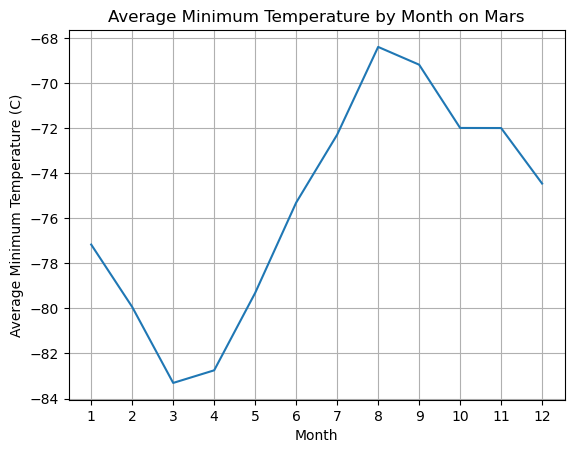

In [50]:
# Plot the average minimum temperature by month
plt.plot(average_min_temp_by_month.index, average_min_temp_by_month)
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
plt.grid()
plt.xticks(range(1,13))
plt.show()


In [57]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperatures
sorted_temp_by_month = average_min_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_temp_by_month.idxmin()
hottest_month = sorted_temp_by_month.idxmax()

print(f"The coldest month is : Month {coldest_month} with an average minimum temperature of {sorted_temp_by_month.min():.2f}C")
print(f"The hottest month is : Month {hottest_month} with an average minimum temperature of {sorted_temp_by_month.max():.2f}C")

The coldest month is : Month 3 with an average minimum temperature of -83.31C
The hottest month is : Month 8 with an average minimum temperature of -68.38C


In [58]:
# 4. What is the average pressure by month?
# Group the data by month and calculate the mean of pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display results
print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


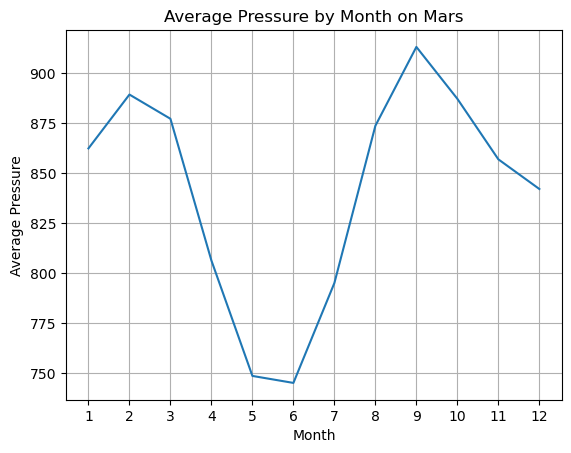

In [59]:
# Plot the average pressure by month
plt.plot(average_pressure_by_month.index, average_pressure_by_month)
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.grid()
plt.xticks(range(1,13))
plt.show()


In [61]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the pressures
sorted_pressure_by_month = average_pressure_by_month.sort_values()

# Identify the coldest and hottest months
lowest_month = sorted_pressure_by_month.idxmin()
highest_month = sorted_pressure_by_month.idxmax()

print(f"The lowest month is : Month {lowest_month} with an average minimum temperature of {sorted_pressure_by_month.min():.2f}")
print(f"The highest month is : Month {highest_month} with an average minimum temperature of {sorted_pressure_by_month.max():.2f}")

The lowest month is : Month 6 with an average minimum temperature of 745.05
The highest month is : Month 9 with an average minimum temperature of 913.31


In [62]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Find the range of sols to identify a full Martian year
min_sol = df['sol'].min()  # Start of the Martian year
max_sol = df['sol'].max()  # End of the Martian year

# Extract dates corresponding to the start and end of a Martian year
start_date = df[df['sol'] == min_sol]['terrestrial_date'].min()
end_date = df[df['sol'] == max_sol]['terrestrial_date'].max()

# Calculate the number of terrestrial days in a Martian year
terrestrial_days_in_martian_year = (end_date - start_date).days

# Display the result
print(f"The number of terrestrial (Earth) days in a Martian year is approximately: {terrestrial_days_in_martian_year} days")

The number of terrestrial (Earth) days in a Martian year is approximately: 2021 days


#### Minimum Temperature

| Month | Average Min_Temp |
|-------|------------------|
| 1     | -77.160920       |
| 2     | -79.932584       |
| 3     | -83.307292       |
| 4     | -82.747423       |
| 5     | -79.308725       |
| 6     | -75.299320       |
| 7     | -72.281690       |
| 8     | -68.382979       |
| 9     | -69.171642       |
| 10    | -71.982143       |
| 11    | -71.985507       |
| 12    | -74.451807       |



#### Atmospheric Pressure
| Month | Average Atmospheric Pressure |
|-------|------------------|
| 1     | 862.488506       |
| 2     | 889.455056       |
| 3     | 877.322917       |
| 4     | 806.329897       |
| 5     | 748.557047       |
| 6     | 745.054422       |
| 7     | 795.105634       |
| 8     | 873.829787       |
| 9     | 913.305970       |
| 10    | 887.312500       |
| 11    | 857.014493       |
| 12    | 842.156627       |


#### Year Length

2021 Days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index = False)

In [34]:
browser.quit()